# idea of Gradient Boosting

- similar to AdaBoost, Gradient Boosting iteratively combines a seq of weak learners to produce a strong learner


- they differ on how to create weak learners

    - AdaBoost: new training set is the weighted data set
    
        **changes weights of data** due to structure of exponential loss
    
    - Gradient Boosting: new training set is residuals vs. $x$
    
         consider **residuals** due to structure of squared loss

# loss function: squared error

Gradient Boosting use squared error as loss function

$$
L(y,f(\mathbf{x}))=(y-f(\mathbf{x}))^2
$$

then the loss for ith observ is:

$$
L \left(\mathbf{y}_i, {\color{Red} {f_{m-1}(\mathbf{x})+\beta b(x;\gamma)}}\right)
=\left[\mathbf{y}_i - f_{m-1}(\mathbf{x})-\beta b(x;\gamma)\right]^2=\left[\color{Red}{r_i} - \beta b(x;\gamma)\right]^2
$$

where $r_i=\mathbf{y}_i - f_{m-1}(\mathbf{x})$ is the residual of ith observ

- then training goal is to solve

$$
(\hat{\beta}_m, \hat{\gamma}_m)=\underset{\beta, \gamma}{\arg \min}\sum_{i=1}^n \left[\color{Red}{r_i} - \beta b(x;\gamma)\right]^2
$$

we could ignore $y$ and $f$, just focus on learning $\beta$ and $\gamma$ to obtain a good $\beta\ b(x;\gamma)$ to fit $r$

make small adjustment when build up $f$ in stages

after $M$ iterations, $f$ will be a sum of weak learners (decision stumps)

$$
f(\mathbf{x})=f_0(\mathbf{x})+f_1(\mathbf{x})+...+f_M(\mathbf{x})=\sum_{i=0}^M f_i(\mathbf{x})
$$

# Boosting stages: process of building up model

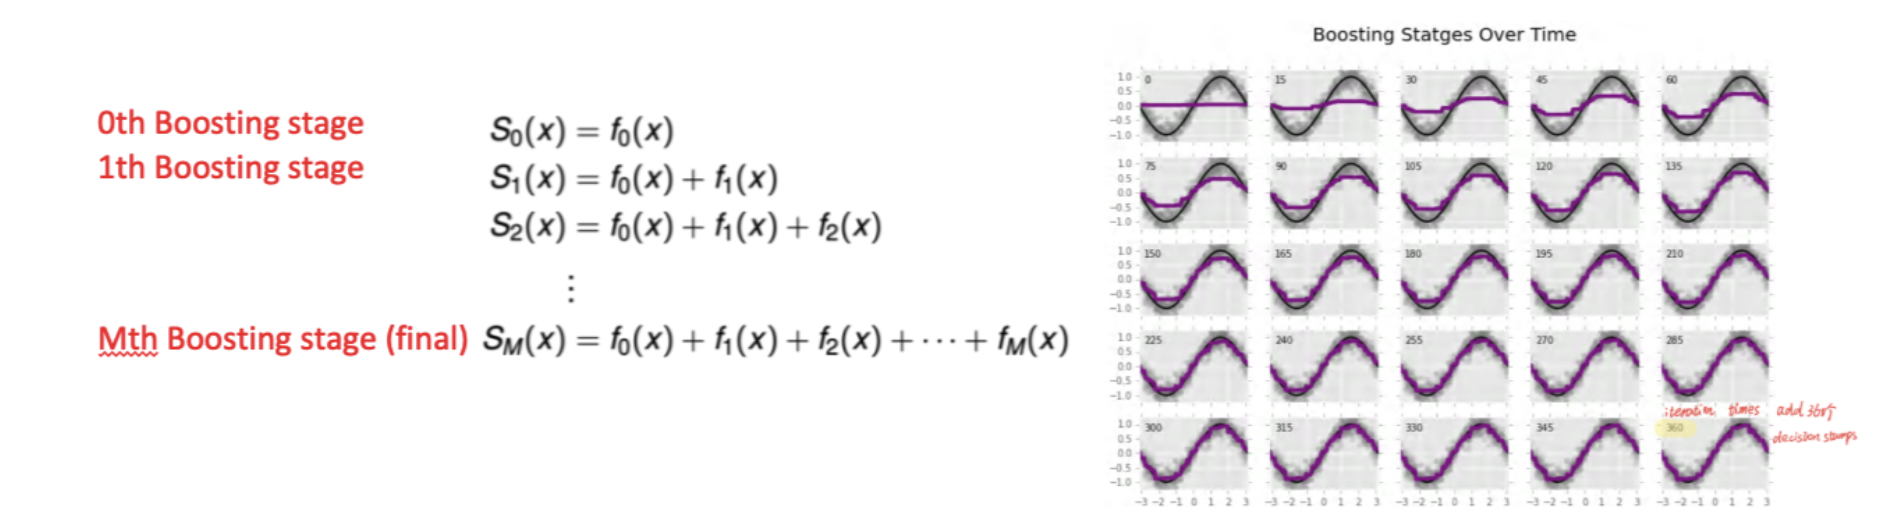

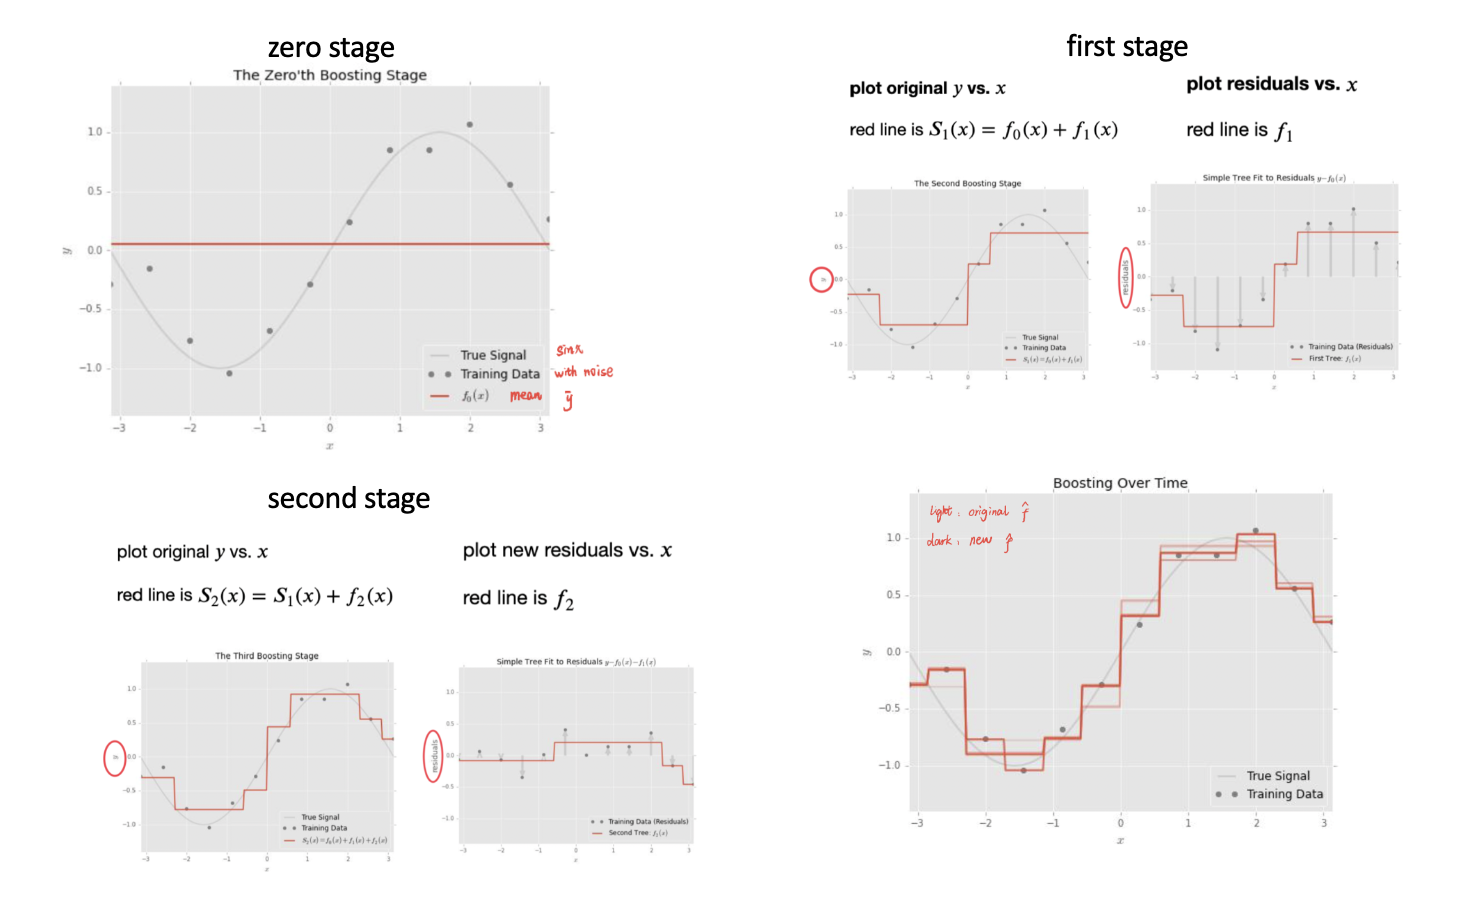

## zero stage: where should we start?

we want to make the simplest choice for zero stage $f_0(\mathbf{x})$

$$
f_0(\mathbf{x})=constant
$$

a natural choice is **mean** of responses

$$
f_0(\mathbf{x})= \bar y
$$

## first stage: how to pick $f_1$ ?

our next task is to find a $f_1$ to update our simple regressor $S_0(\mathbf{x})=f_0(\mathbf{x})$ to $S_1(\mathbf{x})=f_0(\mathbf{x})+f_1(\mathbf{x})$

residuals $e_i = \mathbf{y}_i - f_0(\mathbf{x}_i)$ can answer this question

let $x$ to be same, response values to be residuals $y_{new,i}=e_i$, now we have a new dataset (working data set)

$f_1$ is a model that fit this new training dataset by minimizing least squares

## second stage: how to pick $f_2$ ?

new residuals $e_i = \mathbf{y}_i - f_0(\mathbf{x}_i)-f_1(\mathbf{x}_i)$ can answer this question

let $x$ to be same, response values to be the new residuals $y_{new,i}=e_i$, now we have another new dataset again

$f_2$ is a model that fit this new training dataset

## Boosting over time: iterate as before to find the final $S_M(\mathbf{x})$

the $m$ th Boosting stage:

$$
S_{m}(\mathbf{x})=S_{m-1}(\mathbf{x})+f_{m}(\mathbf{x})
$$

where $f_{m}(\mathbf{x})$ is the residual fitted tree

### a small fraction of $f_m(\mathbf{x})$

instead of adding the whole residual fitted tree $f_{m}(\mathbf{x})$ to the previous model,

$$
S_{m}(\mathbf{x})=S_{m-1}(\mathbf{x})+f_{m}(\mathbf{x})
$$

we just add a small fraction of $f_{m}(\mathbf{x})$

$$
S_{m}(\mathbf{x})=S_{m-1}(\mathbf{x})+\lambda f_{m}(\mathbf{x})
$$

where $\lambda$ is the learning rate (step size), e.g., 0.01

# Algorithm

1. initialize the first model $S_0(\mathbf{x})$ to be the mean of response

$$
S_0(\mathbf{x}) = f_0(\mathbf{x})=\frac{1}{n}\sum_{i=1}^n \mathbf{y}_i
$$


2. for the $m+1$ th iteration, $m = 1,2,...,M$

- create a working data set $W_m$

    $$W_m = \left\{ \mathbf{x}_i, \mathbf{y}_i - S_{m}(\mathbf{x}_i) \right\}_{i=1}^n$$

    where $\mathbf{y}_i - S_{m}(\mathbf{x}_i)$ is the residual for the $i$ th observ in the $m$ th iteration


- use a regression tree $f_m$ to fit this working data set $W_m$ by minimizing least squares

$$
f_m=\underset{f}{\arg \min} \sum_{i=1}^n \left[\mathbf{y}_i - S_{m}(\mathbf{x}_i)-f(\mathbf{x}_i)\right]^2
$$


- update the model $S_{m}(\mathbf{x})$ using a small fraction of $f_m$ 

$$
S_{m+1}(\mathbf{x}) =S_{m}(\mathbf{x})+ \lambda f_{m}(\mathbf{x})
$$


3. return the final model $S_{M}(\mathbf{x})$

$$
S_{M}(\mathbf{x})=f_0(\mathbf{x}) + \lambda f_{1}(\mathbf{x}) +...+ \lambda f_{M}(\mathbf{x})
$$


4. Model selection: find the optimal $\lambda$

# why this algorithm is called gradient?

because **negative gradient of squared loss is just residual**

training goal is to minimize squared loss for $m$ th model:

$$
\hat S_m(\mathbf{x}) =\underset{S}{\arg \min} L(y,S(\mathbf{x}))=\underset{S}{\arg \min} \frac{1}{2} (y-S(\mathbf{x}))^2=\underset{S}{\arg \min} \frac{1}{2} (\text{residual})^2
$$

where $\frac{1}{2}$ is for scaling

rewrite it as

$$
\hat y^* =\underset{\hat y}{\arg \min} L(y, \hat y)=\underset{\hat y}{\arg \min}  \frac{1}{2} (y- \hat y)^2
$$

so we compute gradient of this loss with respect to $\hat y$ to know what direction $\hat y$ should go in order to minimize loss

it turns out to be that negative direction is **residual**


$$
- \nabla_{\hat y} L(y, \hat y)=-\frac{\partial L(y, \hat y)}{\partial \hat y}=- \frac{1}{2}\times 2 (y-\hat y)(-1)=y- \hat y = y- S_m(\mathbf{x}) = e
$$

set negative direction to 0 to find optimal $S_m(\mathbf{x})$

- for regression with squared loss:

    - residual $\Leftrightarrow $ negative gradient

    - fit model to residual $\Leftrightarrow $ fit model to negative gradient


- Thus, in some loose sense, we are fitting model using **functional** gradient descent

    the function is respect to $\hat y$ rather than params


- gradient is a better paradigm, and allow us to generalize to other loss functions

# generalized algorithm

1. initialize the first model $S_0(\mathbf{x})$ to be the mean of response

$$
S_0(\mathbf{x}) = f_0(\mathbf{x})=\frac{1}{n}\sum_i \mathbf{y}_i
$$


2. for the $m+1$ th iteration, $m = 1,2,...,M$

- compute **negative gradient (pseudo-residuals)** $\mathbf{r}_m \in \mathbb{R}^n$

$$
\mathbf{r}_m = -\frac{\partial L(y, \hat y)}{\partial \hat y}
$$

- create a working data set $W_m$

$$
W_m = \left\{\mathbf{x}_i, [\mathbf{r}_m]_i\right\}_{i=1}^n
$$

- use a weak learner $f_m$ to fit this working data set $W_m$ by minimizing loss function of this working data set

$$
\hat f_m=\underset{f}{\arg \min} L(\mathbf{r}_m, f)
$$

- pick optimal step size $\lambda_m$ by minimizing loss function of original training set

$$
\lambda_m = \arg \min_{\lambda} L(y, S_{m-1}(\mathbf{x}) + \lambda f_m(\mathbf{x}) )
$$

- update the model $S_{m}(\mathbf{x})$ using a small fraction $\lambda_m$ of $f_m$ 

$$
S_{m+1}(\mathbf{x}) =S_{m}(\mathbf{x})+ \lambda f_{m}(\mathbf{x})
$$


3. return the final model $S_{M}(\mathbf{x})$

$$
S_{M}(\mathbf{x})=f_0(\mathbf{x}) + \lambda f_{1}(\mathbf{x}) +...+ \lambda f_{M}(\mathbf{x})
$$

Note: 

- for the choice of $\lambda_m$

    sometimes directly minimizing loss function of working dataset $L(\mathbf{r}_m, f)$ is computationally complex,

    we have 2 alterative methods

1. minimize $l_2$ norm of pseudo-residual $\mathbf{r}_m$ and weak learner $f$

    which means let direction of $f$ to be align with $\mathbf{r}_m$

$$
f_m(\mathbf{x})=\arg \min_f \left \| \mathbf{r}_m - f \right \|^2
$$

2. just pick $\lambda_m$ that decrease loss rather than minimize loss

    we do binary search until $\lambda_m$ is sufficiently small

-  we can use the generalized framework to do Newton Gradient Descent too

# Gradient Tree Boosting - Friedman

difference between Generalized Gradient Boosting is instead of picking a $\lambda$ for a whole tree, 

Gradient Tree Boosting pick **different $\lambda$ ($\theta$) for each leaf of the tree**

1. initialize the first model $S_0(\mathbf{x})$ to be the mean of response

$$
S_0(\mathbf{x}) = f_0(\mathbf{x})=\frac{1}{n}\sum_i \mathbf{y}_i
$$


2. for the $m+1$ th iteration, $m = 1,2,...,M$

- compute **negative gradient (pseudo-residuals)** $\mathbf{r}_m \in \mathbb{R}^n$

$$
r_{i, m} = -\frac{\partial L(\mathbf{y}_i, \hat{\mathbf{y}}_i)}{\partial \hat{\mathbf{y}}_i}
$$

- create a working data set $W_m$

$$
W_m = \left\{\mathbf{x}_i, [\mathbf{r}_m]_i\right\}_{i=1}^n
$$

- use a weak learner $f_m$ to fit this working data set $W_m$ by minimizing loss function of this working data set

$$
f_m=\arg \min_f L(r_{i,m}, f(\mathbf{x}_i))=\arg \min_f \sum_{i=1}^n (r_{i,m}- f(\mathbf{x}_i))^2
$$

- fit values at **leaves** by minimizing loss function of original training set

$$
\theta_l = \underset{\theta}{\arg \min} \sum_{\mathbf{x}_i\ \in \text{leaf l}} L(\mathbf{y}_i, \theta + f_m(\mathbf{x}_i) )
$$

- update the model $S_{m}(\mathbf{x})$ using $\theta_{l(\mathbf{x})}$ 

$$
S_{m+1}(\mathbf{x}) =S_{m}(\mathbf{x})+ \theta_{l(\mathbf{x})}
$$

where $l(\mathbf{x})$ is the leaf that $x$ falls to

3. return the final model $S_{M}(\mathbf{x})$

$$
S_{M}(\mathbf{x})=f_0(\mathbf{x}) + \lambda f_{1}(\mathbf{x}) +...+ \lambda f_{M}(\mathbf{x})
$$